# Homework 1 BIG

# Task description
We have a mobile vehicle, which should survive after the track. We have some predefined trajectory, which is given in y(x) format.
The goal is to pass this trajectory as fast as possible. But at the end of the path, there is a drop-off. It means that the vehicle should stop in the end.
We have to establish some constraints, such as max tangent acceleration (max power on the motor), normal acceleration (road adhesion).
How the vehicle should move (speed and acceleration) for solving such a task?
Report:
1. Vehicle simulation on the path. You should show a $\vec{v}, \vec{a}, \vec{a_{\tau}}, \vec{a_n}$ on the simulation.
2. plots: $y(t), v(t), a_{\tau}(t), a_n(t)$, — $t$ is time in seconds.
Parameters:
$y(x) = Axln(\frac{x}{B})$, where $A = 3, B = 5, x ∈ [0..4]$
$a_{\tau{max}} = 2, a_{n_{max}} = 3, v_{max} = 3$

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

# Constants
A = 3
B = 5
a_t_max = 2
a_n_max = 3
v_max = 3
dt = 0.01  # time step for simulation, changes the simulation time in html

# Create animation
fig, ax = plt.subplots()


# Define the trajectory y(x)
def y(x):
    return A * x * np.log(x / B)

# Define the derivative of y(x)
def dy_dx(x):
    return A * (np.log(x / B) + 1)

# Define the derivative of the derivative of y(x)
def d2y_dx2(x):
    return A / x

# Function to calculate acceleration components
def calculate_acceleration(v, x):
    v_norm = np.array([1, dy_dx(x)])
    v_norm /= np.linalg.norm(v_norm)
    acc_tangential = np.dot(v, v_norm)
    acc_normal = d2y_dx2(x)
    return acc_tangential, acc_normal


# Initial conditions
x = 0.01  # initial x position, cannot be 0, since "division by zero"
v = np.array([0.01, dy_dx(x)])  # initial velocity

# Lists to store simulation data
x_list = []
y_list = []
v_list = []
a_t_list = []
a_n_list = []

# Simulation loop
total_time = 0  # Variable to track the total simulation time


# Since we are given that the max x-value is 4
while x < 4:
    # Calculate acceleration
    acc_t, acc_n = calculate_acceleration(v, x)
    acc_t = min(a_t_max, acc_t)
    acc_n = min(a_n_max, acc_n)
    
    # Update velocity
    v += np.array([acc_t, acc_n]) * dt
    
    # Limit velocity
    v_norm = np.linalg.norm(v)
    if v_norm > v_max:
        v = v / v_norm * v_max
    
    # Update position
    x += v[0] * dt
    
    # Store data
    x_list.append(x)
    y_list.append(y(x))
    v_list.append(v_norm)
    a_t_list.append(acc_t)
    a_n_list.append(acc_n)
    
    total_time += dt  # Update total simulation time


def update(timestep, x_list, y_list, v_list, a_t_list, a_n_list):
    ax.clear()
    ax.plot(x_list, y_list, 'b--', label='Traj.')
    
    # Ensure timestep is within bounds
    if timestep < len(x_list):
        
        ax.plot(x_list[timestep], y_list[timestep], 'ro')
        
        ax.quiver(x_list[timestep], y_list[timestep], v_list[timestep]*np.cos(np.arctan(dy_dx(x_list[timestep]))), v_list[timestep]*np.sin(np.arctan(dy_dx(x_list[timestep]))), color='r', label='Vel', scale=6)
        
        ax.quiver(x_list[timestep], y_list[timestep], a_t_list[timestep]*np.cos(np.arctan(dy_dx(x_list[timestep]))), a_t_list[timestep]*np.sin(np.arctan(dy_dx(x_list[timestep]))), color='g', label='Acc_t', scale=6)
        
        ax.quiver(x_list[timestep], y_list[timestep], -(x_list[timestep] + a_n_list[timestep]*np.sin(np.arctan(dy_dx(x_list[timestep])))), -(y_list[timestep] + a_n_list[timestep]*np.cos(np.arctan(dy_dx(x_list[timestep])))), color='y', label='Acc_n', scale=10)
        
    
    
    ax.legend()
    ax.set_xlim(-1, 6)
    ax.set_ylim(-6, 1)
    plt.gca().set_aspect(aspect='equal', adjustable='box')
    plt.grid(True)


ani = animation.FuncAnimation(fig, update, frames=int(total_time/dt), fargs=(x_list, y_list, v_list, a_t_list, a_n_list), interval=10)
display(HTML(ani.to_jshtml()))
ani.save("simulation.gif")
# plt.show()
plt.close(fig)

MovieWriter ffmpeg unavailable; using Pillow instead.


In [115]:
# Simulation loop
num_iterations = len(x_list)  # Get the number of iterations
simulation_time = num_iterations * dt * 10 # Calculate the total simulation time. For some reason we need to multiply by 10.
print("Total simulation time:", simulation_time, "seconds")


Total simulation time: 24.1 seconds


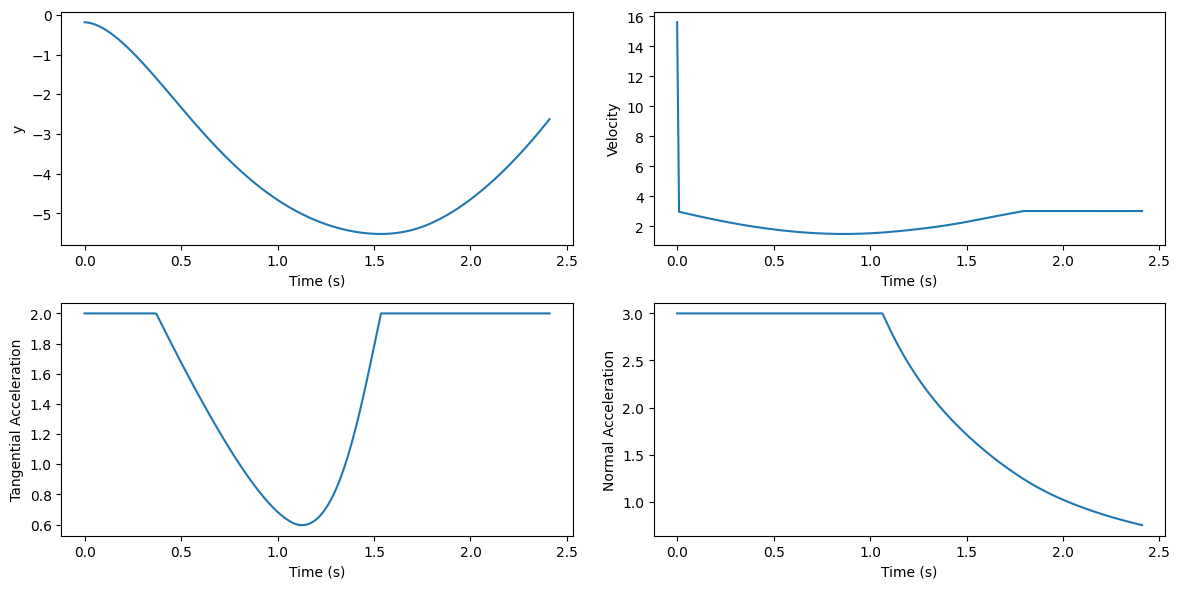

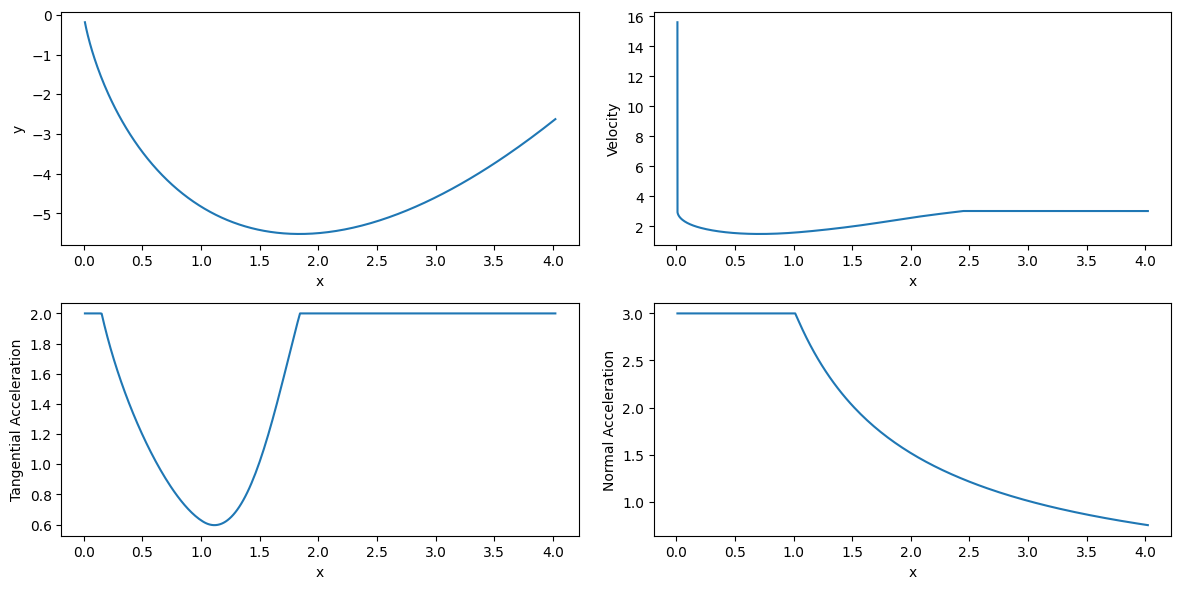

In [116]:
# I've learned how to use subplots :)

# Now we create the figure with needed size
plt.figure(figsize=(12, 6))

# Then plot y(t) in first 'cell'
plt.subplot(2, 2, 1)
plt.plot(np.linspace(0, len(y_list)*dt, len(y_list)), y_list)
plt.xlabel('Time (s)')
plt.ylabel('y')

# Then plot v(t) in the second 'cell' and so on...
plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, len(v_list)*dt, len(v_list)), v_list)
plt.xlabel('Time (s)')
plt.ylabel('Velocity')

# Plot a_t(t)
plt.subplot(2, 2, 3)
plt.plot(np.linspace(0, len(a_t_list)*dt, len(a_t_list)), a_t_list)
plt.xlabel('Time (s)')
plt.ylabel('Tangential Acceleration')

# Plot a_n(t)
plt.subplot(2, 2, 4)
plt.plot(np.linspace(0, len(a_n_list)*dt, len(a_n_list)), a_n_list)
plt.xlabel('Time (s)')
plt.ylabel('Normal Acceleration')

plt.tight_layout()
plt.savefig("plots_time.jpg")
plt.show()

# Then we create another figure to plot y(x), v(x), a_t(x), a_n(x)
plt.figure(figsize=(12, 6))

# Plot y(x)
plt.subplot(2, 2, 1)
plt.plot(x_list, y_list)
plt.xlabel('x')
plt.ylabel('y')

# Plot v(x)
plt.subplot(2, 2, 2)
plt.plot(x_list, v_list)
plt.xlabel('x')
plt.ylabel('Velocity')

# Plot a_t(x)
plt.subplot(2, 2, 3)
plt.plot(x_list, a_t_list)
plt.xlabel('x')
plt.ylabel('Tangential Acceleration')

# Plot a_n(x)
plt.subplot(2, 2, 4)
plt.plot(x_list, a_n_list)
plt.xlabel('x')
plt.ylabel('Normal Acceleration')

plt.tight_layout()
plt.savefig("plots_x.jpg")
plt.show()
